<a href="https://colab.research.google.com/github/rishi-analytics/deep-learning/blob/main/DL2024_assign1_RISHIKESH_KESARI__2414653.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 2024 - Assignment 1

Designed by Marko Savic (marko.savic@oulu.fi)



## Outline (10 points)
#### Submission:
We will give 2 weeks for each assignment and more for the final project.

The grades will be released after the deadline. Please also put your name and student number (if you have one) in the file name of the returned assignments. (DL2024_assign1_NAME_SURNAME_STUDENTNUMBER.ipynb)

#### In this assignment, you will learn:
* How to load data and create a train/test split
* How to build your own Pytorch model for simple linear regression problem on the generated data.
* Training the model with gradient descent algorithm in Pytorch.
* Simple visualisation of data, loss and linear model

#### Tasks (10 points):
* Part 1. Load dataset and split into training and testing sets (1.5 points)
* Part 2.1 Model (1.5 points)
* Part 2.2 Training (7 points)

#### Environment
Python 3 + Pytorch (>=1.3).<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. <br>
If you haven’t installed Pytorch and Jupyter notebook in your computer, an alternative environment to finish the assignment is CSC notebook: [`https://noppe.2.rahtiapp.fi/`](https://noppe.2.rahtiapp.fi/) -> log in with HaKa using your university account -> Jupyter Machine Learning.
Also, googlecolab is available through your google university account (instruction in https://www.oulu.fi/en/for-students/supporting-your-studies-and-contact-information-for-students/it-services-for-students/google-workspace-for-education). Computer room TS135 contains computers with GPUs that you can utilise as well.

We will give 2 weeks for each assignment and more for the final project. So it may happen where the new assignment is published before the deadline of the previous assignment. Please do not wait till the last minute to complete the assigments, as they can be time consuming.

#### Database
* Advertising dataset

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the code from other parts.
* Be careful with the shape of the weights, gradient, .. of your tensor in your implementation. Double check and make sure the shapes fit for computation, especially matrix multiplication.
* Use only torch functions for the model, and avoid iterations. E.g. if you put a for cycle in the model function then parallelism is gone and your model will not run efficiently on GPUs. Also once you have the data loaded as tensors, you need to use torch functions, if you convert to numpy arrays in the training loop then it will not train efficiently.
* Check the examples from the pytorch tutorial lecture, they can help understand the assignment better.

## Part 1. Load dataset and split into training and testing sets

Suppose we observe a set of n real-valued input variables x = $\{x_n\}$ and wish to use this observation to predict
the value of a real-valued target variable $y$. In the tutorial we considered artifical examples with synthetic data. In this exercise we will consider a simple dataset that is suitable for linear regression.

We will take a small advertisement dataset. It contains data on the budget allocated for TV, radio and newspaper advertisements with the resulting sales. It contains n = 200 samples with three variables "TV", "Radio","Newspaper" and the value we want to predict, that is "Sales". Assuming a linear model is a good representation of the correlation between advertisement budgets and final sales, we will try to train a linear model to regress the sales based on advertisement budget.

The dataset is located in the advertisement .csv file and opened as a pandas Dataframe. Firstly we will turn the input variables and regression target into Tensors, and then split the data into training and testing sets. In this case we choose a five fold split, meaning we will use 20% of the data for testing (last 40 samples) and 80% for training (first 160 samples).

Please create the required training and testing data below and plot the relationship between the feature 'TV' and the target. Since we have 3 different features, we will only pick 'TV' a 2D plot.

In [4]:
!pip install onedrivedownloader

from onedrivedownloader import download
import os
link = 'https://unioulu-my.sharepoint.com/:x:/g/personal/msavic21_univ_yo_oulu_fi/Eb211jNyQAVIhTq1HsoxQyEBEqoDNHhr606Kfh9LY5Brjw?e=cONlaG'

#if not os.path.exists('./data/fashion_mnist_npy'):
#    print('Downloading dataset')
download(link, filename="./advertising.csv", unzip=True, unzip_path='./')

'./advertising.csv'

In [5]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np
import pandas as pd

adv_dataset=pd.read_csv('./advertising.csv')
adv_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
print(adv_dataset.head())  # Check the first few rows of the dataset
print(adv_dataset.info())  # Confirm columns, data types, and non-null values

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [9]:
# TODO: (1.5 points, details are given below):
#-- this part i.e., part 1 TODO is divided into 3 code cells for easier implementation

# get the relevant data from the adv_dataset dataframe and assign them to the Tensors x (feature variables) and y (target)  (0.5 point)
# YOUR CODE HERE

features = ['TV', 'Radio', 'Newspaper']  # Replace with actual feature column names
target = 'Sales'  # Replace with the actual target column name

x = torch.tensor(adv_dataset[features].values, dtype=torch.float32)
y = torch.tensor(adv_dataset[target].values, dtype=torch.float32)
print(x.size(), y.size())

torch.Size([200, 3]) torch.Size([200])


In [10]:
# divide the data in a train set (80% of the data) and test set (20% of the data). Resulting in x_train, x_test, y_train, y_test (0.5 point)
# YOUR CODE HERE

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())

torch.Size([160, 3]) torch.Size([160])
torch.Size([40, 3]) torch.Size([40])


In [11]:
print(x.shape)  # Should be (num_samples, num_features)
print(y.shape)  # Should be (num_samples,)

torch.Size([200, 3])
torch.Size([200])


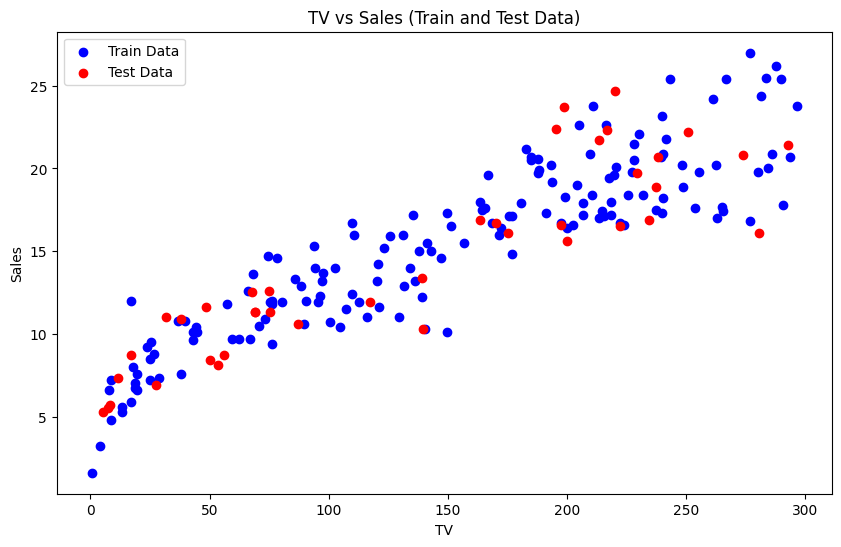

In [12]:
# plot the first feature 'TV' in relationship with the target y. Train and test data should be in a single figure with two different colors (0.5 point)
# YOUR CODE HERE

# Plotting 'TV' vs 'Sales' for both training and testing sets
plt.figure(figsize=(10, 6))

# Plot for training data
plt.scatter(x_train[:, 0], y_train, color='blue', label='Train Data')

# Plot for testing data
plt.scatter(x_test[:, 0], y_test, color='red', label='Test Data')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales (Train and Test Data)')
plt.legend()
plt.show()

## Part 2. Solving the linear regression problem in Pytorch using Gradient Descent Algorithm
Congratulations you have prepared the data correctly! Now we will move onto creating our model and training it.

### 2.1 Model
In this part, you will define your own model class. To do that, you have to remember the following rules:
1. The model class should be inherited from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module);
2. Re-write the **\_\_init\_\_** function and the **forward** function;
3. In the **\_\_init\_\_** function, you should always call the parent's **\_\_init\_\_** function first.
4. Don't use the nn.Linear() layer, implement it yourself.
5. Use 1 tensor to define w (not 3) and 1 tensor to define b.
6. Only torch functions and no iterations inside the model.

To make it simpler, since we are using a linear function to approximate the phenomenon that generated the data, our function will be:

\begin{align*}
y = w^T x + b
\end{align*}

Therefore, in the model, we need to set 2 parameters: $w$, $b$

In [14]:
# TODO (1.5 points, details are given below)
import torch.nn as nn


# define a class (0.5) + write the __init__ function (0.5 point) + write the forward function (0.5 points)

# YOUR CODE HERE
import torch
import torch.nn as nn

# Define the model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        # Call the parent class (nn.Module) constructor
        super(LinearRegressionModel, self).__init__()

        # Define the weights (w) and bias (b) as tensors
        # w is a tensor with shape (3, 1), since we have 3 features
        self.w = torch.randn(3, 1, requires_grad=True)
        # b is a tensor with shape (1, )
        self.b = torch.randn(1, requires_grad=True)

    def forward(self, x):
        # Linear regression equation: y = w^T * x + b
        return torch.matmul(x, self.w) + self.b

# Instantiate the model
model = LinearRegressionModel()

# Print the model to check if it's implemented correctly
print(model)


LinearRegressionModel()


continuing the process step by step:

In [1]:
import torch
import torch.nn as nn

# Define the model class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size=3):  # Assuming 3 features
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Linear layer with 3 inputs and 1 output

    def forward(self, x):
        return self.linear(x)

In [5]:
# Initialize the model and optimizer
model = LinearRegressionModel(input_size=3)  # Ensure input_size matches the features in your data

# Set a workable learning rate
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
print("Optimizer initialized successfully.")

Optimizer initialized successfully.


In [3]:
print("Model parameters:", list(model.parameters()))

Model parameters: [Parameter containing:
tensor([[-0.3556, -0.1964, -0.0845]], requires_grad=True), Parameter containing:
tensor([0.3337], requires_grad=True)]


In [4]:
import torch.optim as optim

learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
print("Optimizer initialized successfully.")

Optimizer initialized successfully.


### 2.2 Training
Here, you will train your model based on the training data and evaluate the model on testing data.
1. Set proper number of iterations and learning rate.
2. Remember to use a proper optimizer (you may have many choices: Adam, SGD, RMSprop, ... please find the detailed information in https://pytorch.org/docs/stable/optim.html and know how to use them).
3. In order to train the model, a loss function should be defined:
\begin{align*}
loss = \frac{1}{N}\sum_{i=1}^{N}|f_i - y_i|,
\end{align*}
where, $f_i$ is the output of the model and $N$ is the number of training data pairs.
4. The model must be trained only using training data.
5. Remember to clear the old gradients of parameters before a new backward propagation.
6. In every certain number of iterations, print the values of the parameters, the training loss, and the testing loss.
7. Meanwhile, please track the training loss and the testing loss in each iteration. Once the training is done, the curves of losses should be plotted (two curves are drawn in the same figure, where x axis indicates iterations and y axis indicates the losses).
8. Lastly, draw all the training data, testing data and the curve of the trained model in the same figure (use different showing styles to distinguish them).

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([160])) that is different to the input size (torch.Size([160, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iteration: 0001 | Training loss: 35623152.000000 | Testing loss: 117766643712.000000
Iteration: 0101 | Training loss: nan | Testing loss: nan
Iteration: 0201 | Training loss: nan | Testing loss: nan
Iteration: 0301 | Training loss: nan | Testing loss: nan
Iteration: 0401 | Training loss: nan | Testing loss: nan
Iteration: 0501 | Training loss: nan | Testing loss: nan
Iteration: 0601 | Training loss: nan | Testing loss: nan
Iteration: 0701 | Training loss: nan | Testing loss: nan
Iteration: 0801 | Training loss: nan | Testing loss: nan
Iteration: 0901 | Training loss: nan | Testing loss: nan
Iteration: 1001 | Training loss: nan | Testing loss: nan
Iteration: 1101 | Training loss: nan | Testing loss: nan
Iteration: 1201 | Training loss: nan | Testing loss: nan
Iteration: 1301 | Training loss: nan | Testing loss: nan
Iteration: 1401 | Training loss: nan | Testing loss: nan
Iteration: 1501 | Training loss: nan | Testing loss: nan
Iteration: 1601 | Training loss: nan | Testing loss: nan
Ite

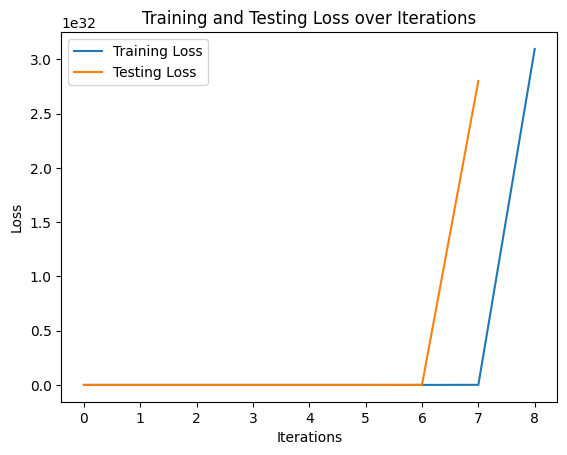

In [29]:
# TODO (1.5 points, details are given below)

# define a class (0.5) + write the __init__ function (0.5 point) + write the forward function (0.5 points)

# YOUR CODE HERE

import torch.nn as nn
import torch.optim as optim
import torch

# Define the loss function (Mean Squared Error for regression)
criterion = nn.MSELoss()

# have the training and testing data:
# x_train, y_train, x_test, y_test
# Ensure they are tensors with appropriate shapes
# For example:
# x_train = torch.randn(160, 3)  # 160 samples, 3 features
# y_train = torch.randn(160, 1)  # 160 target values
# x_test = torch.randn(40, 3)    # 40 testing samples, 3 features
# y_test = torch.randn(40, 1)    # 40 target testing values

# Training loop setup
n_itr = 10000  # Number of iterations for training
training_losses = []  # To track training loss
testing_losses = []  # To track testing loss

for i in range(n_itr):
    # Train mode (forward propagation)
    model.train()
    y_pred = model(x_train)  # Forward pass: predicted values

    # Calculate training loss
    loss = criterion(y_pred, y_train)
    training_losses.append(loss.item())  # Store the training loss

    # Backward propagation (gradient calculation and weight update)
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Evaluate on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        y_test_pred = model(x_test)  # Forward pass on test data
        test_loss = criterion(y_test_pred, y_test)  # Calculate test loss
    testing_losses.append(test_loss.item())  # Store the test loss

    # Print intermediate results every 100 iterations
    if i % 100 == 1:
        print(f'Iteration: {i:04d} | Training loss: {loss.item():.6f} | Testing loss: {test_loss.item():.6f}')

# plot the traing losses and testing losses (0.5 point)
# YOUR CODE HERE
# visualizing the training and testing losses
import matplotlib.pyplot as plt

plt.plot(range(n_itr), training_losses, label='Training Loss')
plt.plot(range(n_itr), testing_losses, label='Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss over Iterations')
plt.show()

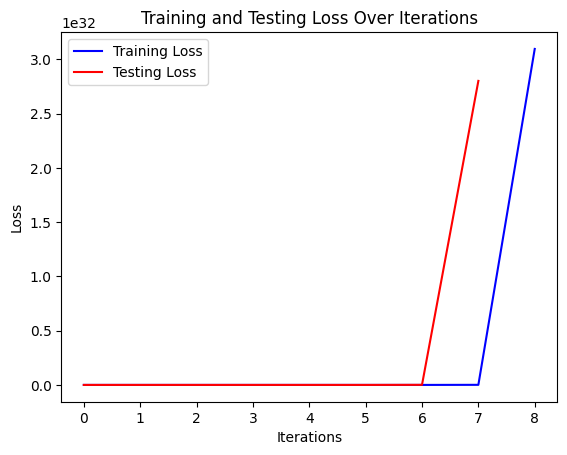

In [30]:
# plot the traing losses and testing losses (0.5 point)
# YOUR CODE HERE

# ploting the training losses and testing losses (0.5 point)
plt.plot(training_losses, label='Training Loss', color='blue')
plt.plot(testing_losses, label='Testing Loss', color='red')

# Adding labels and a title
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Iterations')

# Show the legend to differentiate between the training and testing losses
plt.legend()

# Display the plot
plt.show()

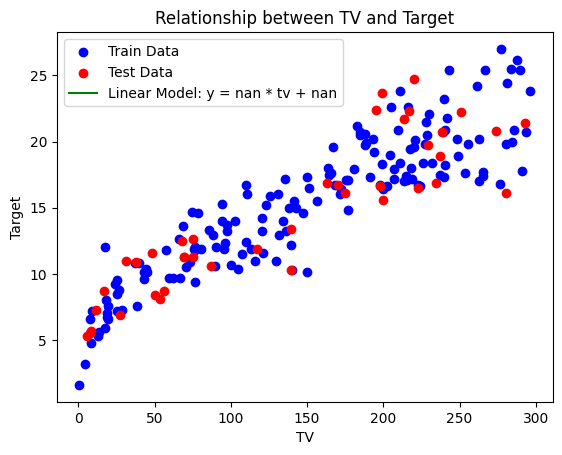

In [32]:
# As our model contains a 3 dimensionsional input, we will only plot the relationship between the first variable 'tv' and the target.
# Again plot the train and test data (from Part1), and add a line where the slope and axis intercept are taken from the model parameters w and b
# (0.5 point)

# YOUR CODE HERE

# Extracting the learned parameters from the model (w and b)
w_tv = model.linear.weight[0, 0].item()  # Weight for 'tv' feature (first feature)
b = model.linear.bias.item()              # Intercept (bias)

# Ploting the training and testing data (from Part 1)
plt.scatter(x_train[:, 0], y_train, color='blue', label='Train Data')
plt.scatter(x_test[:, 0], y_test, color='red', label='Test Data')

# Ploting the regression line based on the learned parameters (w_tv and b)
# y = w_tv * tv + b
tv_range = torch.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 100).reshape(-1, 1)  # Generate a range of values for 'tv'
y_range = w_tv * tv_range + b  # Calculate the corresponding target values (y)

# Ploting the regression line
plt.plot(tv_range.numpy(), y_range.detach().numpy(), color='green', label=f'Linear Model: y = {w_tv:.2f} * tv + {b:.2f}')

# Adding labels and title
plt.xlabel('TV')
plt.ylabel('Target')
plt.title('Relationship between TV and Target')

# Display the legend
plt.legend()

# Display the plot
plt.show()